In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir(r"C:\Users\cvdev\Projects\Geograpic-Flood-Risk-Predictor\geospatial-flood-risk-prediction")

In [173]:
data = pd.read_csv("data/raw/flood_dataset_classification.csv")

In [174]:
data

,Disaster Type,Latitude,Longitude,Total Deaths,Total Affected,duration,time,Rainfall,Elevation,Slope,distance,occured
0,0,52.671700,-0.299500,300.0,3000.0,0.0,1900,1383.125626,11.0,1.788207,0.000000e+00,1
1,0,35.689700,139.692000,1379.0,13790.0,0.0,1909,1383.125626,49.0,24.356508,0.000000e+00,1
2,0,39.905000,116.391000,100000.0,1000000.0,0.0,1909,580.345856,55.0,8.374380,0.000000e+00,1
3,0,23.128800,113.259000,0.0,3000000.0,0.0,1912,2993.401777,7.0,12.917221,0.000000e+00,1
4,0,39.146700,117.206000,0.0,635000.0,0.0,1913,1383.125626,3.0,1.513093,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6232,2,38.980000,70.790000,1.0,145.0,0.0,2016,1662.272831,3654.0,39.448242,0.000000e+00,0
6233,2,40.588581,28.426908,0.0,236.0,0.0,2016,679.452475,0.0,0.000000,1.390229e+06,0
6234,2,-19.761311,-44.314594,0.0,3081.0,0.0,2016,1143.807451,758.0,5.892309,0.000000e+00,0
6235,4,3.000000,42.000000,0.0,4400000.0,0.0,2016,591.941751,413.0,2.623307,0.000000e+00,0


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Disaster Type   6237 non-null   int64  
 1   Latitude        6237 non-null   float64
 2   Longitude       6237 non-null   float64
 3   Total Deaths    6237 non-null   float64
 4   Total Affected  6237 non-null   float64
 5   duration        6237 non-null   float64
 6   time            6237 non-null   int64  
 7   Rainfall        6237 non-null   float64
 8   Elevation       6237 non-null   float64
 9   Slope           6237 non-null   float64
 10  distance        6237 non-null   float64
 11  occured         6237 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 584.8 KB


In [176]:
data = data.drop(['Total Deaths', 'Total Affected', 'Disaster Type', 'time', 'distance'],  axis=1)

In [177]:
data

,Latitude,Longitude,duration,Rainfall,Elevation,Slope,occured
0,52.671700,-0.299500,0.0,1383.125626,11.0,1.788207,1
1,35.689700,139.692000,0.0,1383.125626,49.0,24.356508,1
2,39.905000,116.391000,0.0,580.345856,55.0,8.374380,1
3,23.128800,113.259000,0.0,2993.401777,7.0,12.917221,1
4,39.146700,117.206000,0.0,1383.125626,3.0,1.513093,1
...,...,...,...,...,...,...,...
6232,38.980000,70.790000,0.0,1662.272831,3654.0,39.448242,0
6233,40.588581,28.426908,0.0,679.452475,0.0,0.000000,0
6234,-19.761311,-44.314594,0.0,1143.807451,758.0,5.892309,0
6235,3.000000,42.000000,0.0,591.941751,413.0,2.623307,0


In [178]:
data.isnull().sum()

Latitude     0
Longitude    0
duration     0
Rainfall     0
Elevation    0
Slope        0
occured      0
dtype: int64

In [179]:
data.nunique()

Latitude     4208
Longitude    4247
duration       12
Rainfall     3442
Elevation    1589
Slope        3476
occured         2
dtype: int64

<Axes: >

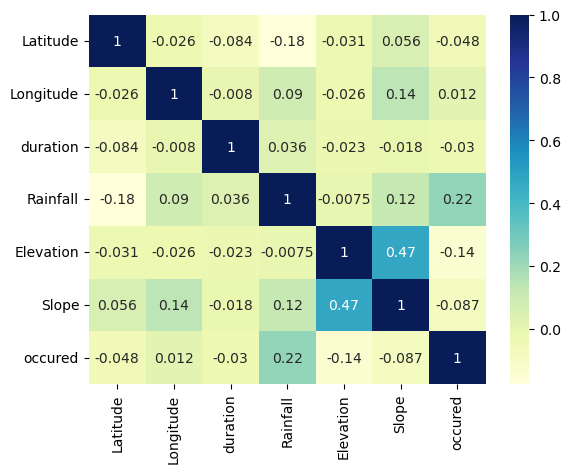

In [180]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [181]:
data['occured'].value_counts(normalize=True)

occured
1    0.672118
0    0.327882
Name: proportion, dtype: float64

In [182]:
elevation_safe = data['Elevation'] + 1

data['rainfall_elevation'] = data['Rainfall'] / elevation_safe
data['rainfall_elevation'] = data['rainfall_elevation'].clip(0, 500)

elevation_range = data['Elevation'].max() - data['Elevation'].min() + 1
data['terrain_risk'] = data['Rainfall'] / elevation_range
data['terrain_risk'] = data['terrain_risk'].clip(0, 50)

slope_normalized = data['Slope'] / (data['Slope'].max() + 1)
data['rain_slope'] = data['Rainfall'] * slope_normalized
data['rain_slope'] = data['rain_slope'].clip(0, 5000)


In [183]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.fillna(data.median(), inplace=True)


In [184]:
for col in ['rainfall_elevation', 'terrain_risk', 'rain_slope']:
    min_val = data[col].min()
    shift = 0
    if min_val <= 0:
        shift = abs(min_val) + 1
    data[col] = np.log1p(data[col] + shift)

In [185]:
X = data.drop(['occured'], axis=1)
y = data['occured']

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
forest = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    random_state=42
)

In [187]:
forest.fit(X_train_s, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [188]:
from sklearn.metrics import classification_report

y_pred = forest.predict(X_test_s)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.85      0.75       301
           1       0.95      0.86      0.90       947

    accuracy                           0.86      1248
   macro avg       0.81      0.86      0.82      1248
weighted avg       0.88      0.86      0.87      1248



In [189]:
importance = pd.Series(forest.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)

Rainfall              0.180949
terrain_risk          0.172334
rainfall_elevation    0.135471
rain_slope            0.113667
Longitude             0.103495
Latitude              0.096566
Elevation             0.088835
Slope                 0.071723
duration              0.036963
dtype: float64

In [190]:
forest.score(X_test_s, y_test)

0.8597756410256411

<Axes: >

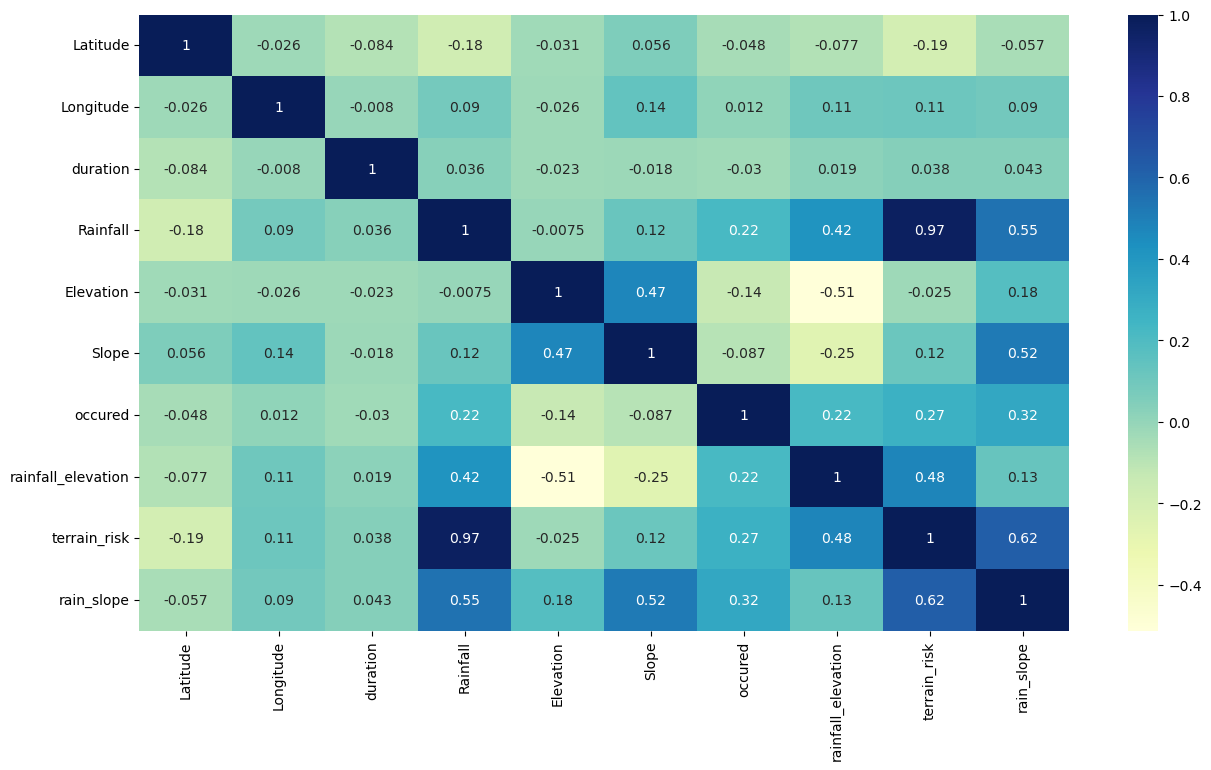

In [191]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [192]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators" : [200, 500],
    "max_depth" : [None, 4],
    "min_samples_split" : [2, 4],
    "random_state": [0, 42],
    "min_samples_leaf": [1, 3]
}

grid_search = GridSearchCV(forest, params, cv=3, scoring="neg_mean_squared_error", return_train_score=True, verbose=2, n_jobs=-1)

grid_search.fit(X_train_s, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_

In [ ]:
best_estimators = grid_search.best_estimator_

In [ ]:
best_estimators.score(X_test_s, y_test)

In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

xgb = XGBClassifier(
    scale_pos_weight=944/304,
    n_estimators=500,
    colsample_bytree=0.6,
    max_depth=10,
    learning_rate=0.1,
)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_s, y_train)
xgb.fit(X_train_res, y_train_res)

In [ ]:
xgb.score(X_test_s, y_test)

In [ ]:
params = {
    "n_estimators" : [500, 700],
    "max_depth" : [10, 12],
    "learning_rate" : [0.1, 0.05],
    "subsample": [0.5, 1],
    "colsample_bytree": [0.6, 0.3]
}

grid_search = GridSearchCV(xgb, params, cv=3, scoring="f1_macro", return_train_score=True, verbose=2, n_jobs=-1)


grid_search.fit(X_train_res, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_estimators = grid_search.best_estimator_

In [ ]:
best_estimators.score(X_test_s, y_test)

In [193]:
import os
os.chdir(r"C:\Users\cvdev\Projects\Geograpic-Flood-Risk-Predictor\geospatial-flood-risk-prediction")

data.to_csv("data/processed/flood_data_processed.csv", index=False)
print("Processed data saved.")

Processed data saved.
